In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import requests
import json

import os
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup

from IPython.core.display import HTML, display

In [2]:

from tqdm import tqdm
import time
from pages.IES_Course import IES_Course
from pages.IES_Thesis import IES_Thesis
from pages.IES_Person import IES_Person


- be able to write functions/classes to make your life easier

Part 1 - Scraping - 5 points.
1: go to WIKI: https://en.wikipedia.org/wiki/FTSE_100_Index
2: scrape the table and iterate over constituents:
- for each company save their ticker and the industry they operate in
● you will use this in the Data analysis part 3 for some basic processing.


In [44]:
def getSoup(link):
    time.sleep(0.1) #to be kind to the website
    r = requests.get(link)
    r.encoding = 'UTF-8'
    return BeautifulSoup(r.text,'lxml')

In [55]:
s = requests.Session()

In [ ]:
url = 'https://en.wikipedia.org/wiki/FTSE_100_Index'

In [57]:
response = s.get(url, timeout = 5)
response

<Response [200]>

In [58]:
soup.title.string

'FTSE 100 Index - Wikipedia'

In [59]:
table = soup.find('table', {"id":'constituents'})

In [101]:
c1 = []
c2 = []
c3 = []
for row in table.findAll("tr"):
    cells = row.findAll('td')
    if len(cells) == 3:
        c1.append(cells[0].find(text=True))
        
        c2.append(cells[1].find(text=True))
        
        c3.append(cells[2].find(text=True)[:-1])

In [102]:
header = [th.text.rstrip() for th in table.findAll("tr")[0].find_all('th')]

In [103]:
header

['Company', 'EPIC', 'FTSE Industry Classification Benchmark sector[12]']

In [104]:
d = dict([(x,0) for x in header])

In [105]:
header

['Company', 'EPIC', 'FTSE Industry Classification Benchmark sector[12]']

In [106]:
d['Company'] = c1
d['EPIC'] = c2
d['FTSE Industry Classification Benchmark sector[12]'] = c3

In [184]:
task_1_df = pd.DataFrame(d)

In [108]:
login_url = 'https://ies-midterm.soulution.rocks/login'

In [112]:
r = requests.post(login_url, json={'cuni':'22138943'})
r.status_code

200

In [118]:
message = r.json()['message']
print(message)

Hello, Ružica Roman, Bc! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook.


In [119]:
r.json()

{'data': {'personal_code': '688d7ad471',
  'dataset_ids': [['557b58dd1d',
    'fc1e690fcf',
    '8a310226b3',
    '2d1aef30ed',
    '8c34bdfc03']]},
 'message': 'Hello, Ružica Roman, Bc! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook.'}

In [123]:
dataset_ids = r.json()['data']['dataset_ids']


In [121]:
personal_code = r.json()['data']['personal_code']

In [122]:
personal_code

'688d7ad471'

In [153]:
data_url = f'https://ies-midterm.soulution.rocks/data/fc1e690fcf'
response = requests.get(data_url)
response.text

'{"data": {"company": "NWG", "data": [{"Date": "2019-01-02", "Open": "5.389999866485596", "High": "5.519999980926514", "Low": "5.380000114440918", "Close": "5.510000228881836", "Adj.Close": "5.151330471038818", "Volume": "1257100"}, {"Date": "2019-01-03", "Open": "5.46999979019165", "High": "5.46999979019165", "Low": "5.369999885559082", "Close": "5.409999847412109", "Adj.Close": "5.057839393615723", "Volume": "912400"}, {"Date": "2019-01-04", "Open": "5.570000171661377", "High": "5.710000038146973", "Low": "5.559999942779541", "Close": "5.679999828338623", "Adj.Close": "5.3102641105651855", "Volume": "760400"}, {"Date": "2019-01-07", "Open": "5.730000019073486", "High": "5.809999942779541", "Low": "5.710000038146973", "Close": "5.760000228881836", "Adj.Close": "5.385056972503662", "Volume": "771900"}, {"Date": "2019-01-08", "Open": "5.78000020980835", "High": "5.829999923706055", "Low": "5.760000228881836", "Close": "5.820000171661377", "Adj.Close": "5.441151142120361", "Volume": "814

In [173]:
data_list = []
for data_code in dataset_ids[0]:
    data_url = f'https://ies-midterm.soulution.rocks/data/{data_code}'
    response = requests.get(data_url)
    
    while response.json()['data'] == {}:
        response = requests.get(data_url)
        
    multiple_level_data = pd.json_normalize(response.json()['data'],meta =['company'], errors='ignore', record_path =['data'], record_prefix='')

    data_list.append(multiple_level_data)

In [174]:
data_list

[           Date                Open                High                 Low  \
 0    2019-01-02  37.720001220703125                38.0   37.59000015258789   
 1    2019-01-03  38.380001068115234   38.84000015258789  38.310001373291016   
 2    2019-01-04   38.81999969482422  39.380001068115234   38.68000030517578   
 3    2019-01-07                39.0   39.13999938964844   38.70000076293945   
 4    2019-01-08  38.380001068115234   38.58000183105469  38.029998779296875   
 ..          ...                 ...                 ...                 ...   
 474  2020-11-17   55.11000061035156   55.41999816894531               54.75   
 475  2020-11-18   55.33000183105469   55.34000015258789  53.959999084472656   
 476  2020-11-19               54.25               54.25   53.66999816894531   
 477  2020-11-20  54.880001068115234   55.41999816894531   54.68000030517578   
 478                             NaN                 NaN                 NaN   
 
                   Close           Adj

In [180]:
whole_dataset = pd.concat(data_list)

In [181]:
whole_dataset

,Date,Open,High,Low,Close,Adj.Close,Volume,company
0,2019-01-02,37.720001220703125,38.0,37.59000015258789,37.79999923706055,35.55956268310547,3594000,AZN
1,2019-01-03,38.380001068115234,38.84000015258789,38.310001373291016,38.33000183105469,36.05815505981445,5013500,AZN
2,2019-01-04,38.81999969482422,39.380001068115234,38.68000030517578,39.18000030517578,36.8577766418457,2854000,AZN
3,2019-01-07,39.0,39.13999938964844,38.70000076293945,38.779998779296875,36.481483459472656,5738700,AZN
4,2019-01-08,38.380001068115234,38.58000183105469,38.029998779296875,38.130001068115234,35.8700065612793,4697400,AZN
...,...,...,...,...,...,...,...,...
474,2020-11-17,61.09000015258789,62.04999923706055,60.93000030517578,61.540000915527344,61.540000915527344,170400,IHG
475,2020-11-18,60.83000183105469,61.72999954223633,60.31999969482422,60.31999969482422,60.31999969482422,134200,IHG
476,2020-11-19,59.060001373291016,59.849998474121094,58.880001068115234,59.81999969482422,59.81999969482422,158000,IHG
477,2020-11-20,59.93000030517578,60.130001068115234,59.54999923706055,59.66999816894531,59.66999816894531,100500,IHG


In [266]:
whole_dataset.to_csv("dataset.csv", index = False)

# End of API abuse

# Overview of least frequent industries

In [197]:
task_1_df.drop("EPIC", 1).groupby('FTSE Industry Classification Benchmark sector[12]').count().sort_values('Company').head(20)

,Company
FTSE Industry Classification Benchmark sector[12],
Industrial Engineering,1
Retail hospitality,1
Precious Metals and Mining,1
Mobile Telecommunications,1
Investment Services,1
Industrial Metals & Mining,1
Travel and Leisure,1
Health Care Equipment & Services,1
Forestry & Paper,1


# Overview of most frequent industries

In [198]:
task_1_df.drop("EPIC", 1).groupby('FTSE Industry Classification Benchmark sector[12]').count().sort_values('Company').tail(20)

,Company
FTSE Industry Classification Benchmark sector[12],
Personal Goods,2
Oil & Gas Producers,2
Nonlife Insurance,2
Aerospace & Defence,2
Beverages,2
Chemicals,2
General Retailers,2
Pharmaceuticals & Biotechnology,3
Real Estate Investment Trusts,3


# Create frequency plot

<AxesSubplot:>

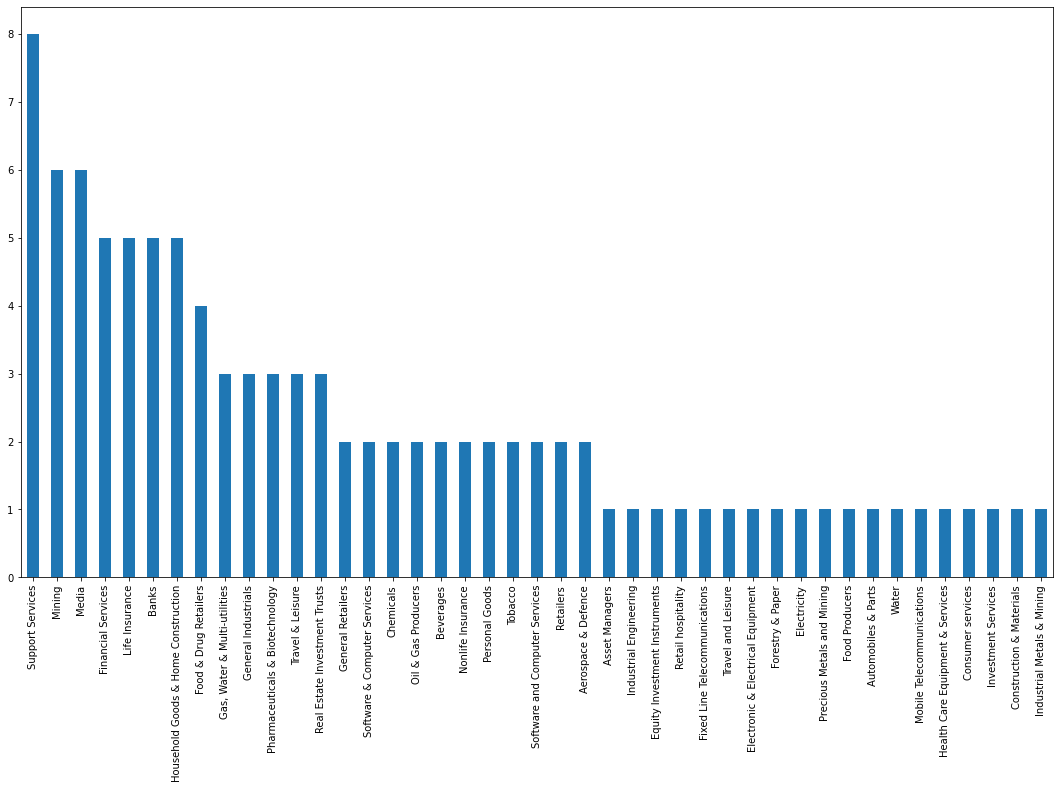

In [188]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
task_1_df['FTSE Industry Classification Benchmark sector[12]'].value_counts().plot(ax=ax, kind='bar')

# Task 2 dataset manipulation

In [267]:
whole_dataset = pd.read_csv("dataset.csv")

In [271]:
whole_dataset.dtypes

Unnamed: 0    int64  
Date          object 
Open          float64
High          float64
Low           float64
Close         float64
Adj.Close     float64
Volume        float64
company       object 
dtype: object

In [272]:
whole_dataset.loc[whole_dataset['Date'].astype('str') < '2019-01-02']

,Unnamed: 0,Date,Open,High,Low,Close,Adj.Close,Volume,company


In [273]:
whole_dataset.loc[whole_dataset['Date'].astype('str') >  '2020-11-20']

,Unnamed: 0,Date,Open,High,Low,Close,Adj.Close,Volume,company
478,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AZN
957,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NWG
1436,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DGE
1915,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RIO
2394,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IHG


just NaNs returned, better drop them for further analysis

In [274]:
whole_dataset_clean = whole_dataset.loc[whole_dataset['Date'].astype('str') <=  '2020-11-20']

In [275]:
whole_dataset_clean

,Unnamed: 0,Date,Open,High,Low,Close,Adj.Close,Volume,company
0,0,2019-01-02,37.720001,38.000000,37.590000,37.799999,35.559563,3594000.0,AZN
1,1,2019-01-03,38.380001,38.840000,38.310001,38.330002,36.058155,5013500.0,AZN
2,2,2019-01-04,38.820000,39.380001,38.680000,39.180000,36.857777,2854000.0,AZN
3,3,2019-01-07,39.000000,39.139999,38.700001,38.779999,36.481483,5738700.0,AZN
4,4,2019-01-08,38.380001,38.580002,38.029999,38.130001,35.870007,4697400.0,AZN
...,...,...,...,...,...,...,...,...,...
2389,473,2020-11-16,62.240002,62.389999,61.540001,61.720001,61.720001,410000.0,IHG
2390,474,2020-11-17,61.090000,62.049999,60.930000,61.540001,61.540001,170400.0,IHG
2391,475,2020-11-18,60.830002,61.730000,60.320000,60.320000,60.320000,134200.0,IHG
2392,476,2020-11-19,59.060001,59.849998,58.880001,59.820000,59.820000,158000.0,IHG


# Highest Adj.Close per company

In [276]:
whole_dataset_clean[['Adj.Close', 'company']].groupby("company").max()

,Adj.Close
company,
AZN,60.615417
DGE,1045.109985
IHG,68.317635
NWG,6.768717
RIO,65.430000


# Date of highest volume traded

In [277]:
whole_dataset_clean_max = whole_dataset_clean.groupby("company").max('Volume')['Volume']

In [278]:
best_dates = whole_dataset_clean.merge(whole_dataset_clean_max, on = ['company', 'Volume'], how = "inner")

In [279]:
whole_dataset_clean[whole_dataset_clean['company'] == 'DGE']

,Unnamed: 0,Date,Open,High,Low,Close,Adj.Close,Volume,company
958,0,2019-01-02,839.270020,856.690002,838.799988,851.700012,851.700012,0.0,DGE
959,1,2019-01-03,850.000000,853.200012,836.380005,837.539978,837.539978,0.0,DGE
960,2,2019-01-04,848.380005,869.690002,848.380005,869.059998,869.059998,0.0,DGE
961,3,2019-01-07,870.520020,898.799988,868.049988,898.739990,898.739990,0.0,DGE
962,4,2019-01-08,906.799988,909.969971,892.900024,904.349976,904.349976,0.0,DGE
...,...,...,...,...,...,...,...,...,...
1431,473,2020-11-16,955.429993,956.330017,948.030029,954.270020,954.270020,0.0,DGE
1432,474,2020-11-17,948.880005,960.799988,944.710022,956.989990,956.989990,0.0,DGE
1433,475,2020-11-18,960.640015,966.150024,945.330017,945.330017,945.330017,0.0,DGE
1434,476,2020-11-19,947.419983,956.299988,942.119995,955.729980,955.729980,0.0,DGE


Looks like DGSE is actually not acording to the dataset. That means that the biggest volume is the same for all days.
For the other companies, see below

In [280]:
best_dates[best_dates['company'] != 'DGE']

,Unnamed: 0,Date,Open,High,Low,Close,Adj.Close,Volume,company
0,389,2020-07-20,62.689999,64.940002,57.650002,58.68,58.214615,56346600.0,AZN
1,304,2020-03-18,2.960000,3.010000,2.820000,2.87,2.683179,7329800.0,NWG
480,52,2019-03-19,58.049999,58.080002,56.070000,56.52,50.415699,7251400.0,RIO
481,310,2020-03-26,41.950001,46.220001,41.630001,43.77,42.777172,1322200.0,IHG


# Total shares traded per company

In [281]:
pd.set_option('display.max_colwidth', -1)
whole_dataset_clean[['Volume', 'company']].groupby("company").sum('Volume').head()


<ipython-input-281-7ec0b67e48fa>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Volume
company,
AZN,2.151856e+09
DGE,0.000000e+00
IHG,1.112703e+08
NWG,7.092185e+08
RIO,1.125708e+09


# Some amazon price plots

<AxesSubplot:>

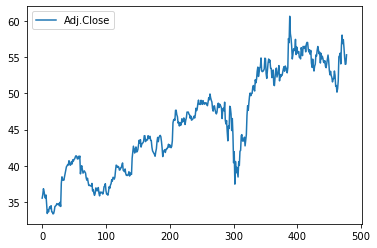

In [283]:
whole_dataset_clean[whole_dataset_clean['company'] == 'AZN'][['Date', 'Adj.Close']].plot(x='Date')

<AxesSubplot:>

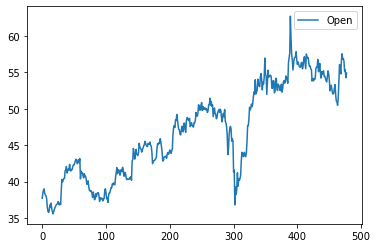

In [284]:
whole_dataset_clean[whole_dataset_clean['company'] == 'AZN'][['Date', 'Open']].plot(x='Date')

<AxesSubplot:xlabel='Date'>

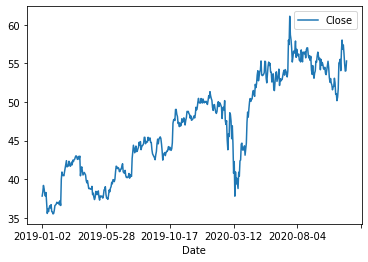

In [286]:
whole_dataset_clean[whole_dataset_clean['company'] == 'AZN'][['Date', 'Close']].plot(x='Date')